In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')

In [2]:
vehicle_stock = pd.read_csv(f'./../TEAM-Kenya_data_out/dashboard-data-out/vehstock-byfuel.csv')
vehicle_stock

,Year,Scenario,Tech.VehType,Tech.Fuel,Value
0,2015,"Omoka (""Growth"")",Motorcycle,Gasoline,989957.887939
1,2015,"Omoka (""Growth"")",Motorcycle,Electricity,49009.911865
2,2015,"Omoka (""Growth"")",Car,Gasoline,334111.601861
3,2015,"Omoka (""Growth"")",Car,Diesel,211850.016472
4,2015,"Omoka (""Growth"")",Car,Electricity,0.426786
...,...,...,...,...,...
338,2050,Streetfighting,Train,Diesel,3517.449859
339,2050,Streetfighting,Ship,Diesel,50.099998
340,2050,Streetfighting,Aeroplane,Aviation fuel (Jet A-1),77.764357
341,2050,Streetfighting,Aeroplane,Electricity,173.286691


In [3]:
vehicle_stock['Year'].unique().tolist()

[2015, 2030, 2040, 2050]

In [4]:
vehicle_stock['Tech.VehType'].unique()

array(['Motorcycle', 'Car', 'Bus', 'Truck', 'Train', 'Ship', 'Aeroplane'],
      dtype=object)

In [5]:
# define vehtype and fuel groupings 
vehtype_groupings = {'Moto': ['Motorcycle'], 'Car': ['Car'], 'Bus/Matatu': ['Bus'], 'Truck': ['Truck'], 'Train': ['Train'], 'Ship': ['Ship'], 'Aeroplane': ['Aeroplane']}

fuel_groupings = {'Petrol': ['Gasoline'], 'Battery Electric': ['Electricity'], 'Diesel': ['Diesel'], 'Biofuels/Mixes': ['Bioethanol(85)-petrol(15) blend', 'Biodiesel (FT, synthetic)'], 'Hydrogen': ['Liquefied Hydrogen', 'Gaseous Hydrogen'], 'Jet Fuel': ['Aviation fuel (Jet A-1)'], 'CNG/LPG':['Compressed Natural Gas', 'Liquified Petroleum Gas']}

# define scenarios and years
scenarios = ['Omoka ("Growth")',
 'Electric Dreams',
 'Kujinao ("Know yourself")',
 'Streetfighting']

years = [2015, 2030, 2040, 2050]

In [6]:
# stacked bar chart - scenario comparison. first, populate data
data_by_scenario = {}

for scenario in scenarios:

    data_by_year = {}
    
    for year in years:
        
        data_by_vehtype = {}
        
        for vehtype in vehtype_groupings:
            
            data_by_fuel = {}
            
            for fuel in fuel_groupings:
                
                data_by_fuel[fuel] = vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum()
                
            data_by_vehtype[vehtype] = data_by_fuel
            
        data_by_year[year] = data_by_vehtype
        
    data_by_scenario[scenario] = data_by_year

In [7]:
# group chart data by veh type and fuel
chart_data = {}

for vehtype in vehtype_groupings:
    
    for fuel in fuel_groupings:
        
        data_list = []
        
        for scenario in scenarios:
            
            for year in years:
                
                if year == 2015:
                    if scenario == 'Omoka ("Growth")':
                        data_list.append(vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum())       

                else:
                    data_list.append(vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum())       
                    
                # if vehicle_stock[(vehicle_stock['Scenario'] == scenario) & (vehicle_stock['Year'] == year) & (vehicle_stock['Tech.VehType'].isin(vehtype_groupings[vehtype])) & (vehicle_stock['Tech.Fuel'].isin(fuel_groupings[fuel]))]['Value'].sum() > 0:
                        
        chart_data[f'{vehtype}, {fuel}'] = data_list

In [8]:
labels = ('Baseline 2015',
 'Omoka 2030',
 'Omoka 2040',
 'Omoka 2050',
 'Electric Dreams 2030',
 'Electric Dreams 2040',
 'Electric Dreams 2050',
 'Kujinao 2030',
 'Kujinao 2040',
 'Kujinao 2050',
 'Streetfighting 2030',
 'Streetfighting 2040',
 'Streetfighting 2050')

In [9]:
chart_data

{'Moto, Petrol': [989957.887939454,
  438873.8349810243,
  32215.67427381097,
  4314.45172760674,
  312306.2545977233,
  6475.673835120777,
  775.498233462989,
  467146.2207909821,
  57604.39321064686,
  16807.7254725798,
  859755.9372759463,
  393453.9849198683,
  290666.847223144],
 'Moto, Battery Electric': [49009.9118652344,
  1525621.2145519853,
  2361427.230335114,
  2785702.577607858,
  2769430.350416243,
  4355625.481033914,
  5754860.278682608,
  1454137.1621667196,
  2400887.2177144424,
  2986078.041822508,
  831584.3440075521,
  1598267.5949236115,
  1999512.6945968703],
 'Moto, Diesel': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Biofuels/Mixes': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Hydrogen': [0.0,
  0.0005816203028246,
  0.0,
  0.0,
  0.0001814910776696,
  0.0,
  0.0,
  0.0007723817604983,
  0.0002673985136425,
  0.0004174716085856,
  0.0024530472455808,
  

In [10]:
# colour by vehicle type, hash by fuel type
clr_palette = sns.color_palette('colorblind')
clrs = {}
cnt=0
for vehtype in vehtype_groupings:
    clrs[vehtype] = clr_palette[cnt]
    cnt+=1
    
cnt=0
hatches = ['oo', 'xx', '++', '-', '||', '//', '\\\\']
htchs = {}
for fuel in fuel_groupings:
    htchs[fuel] = hatches[cnt]
    cnt+=1

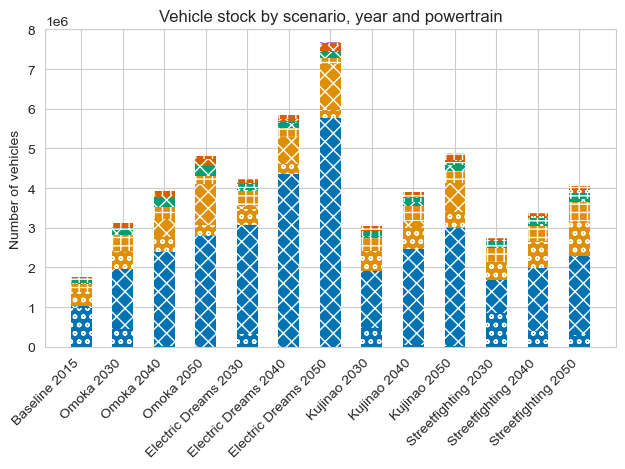

In [11]:
fig, ax = plt.subplots()

bottom = np.zeros(len(labels))

width = 0.5

for cat in chart_data:
    p = ax.bar(labels, chart_data[cat], width, label=cat, bottom=bottom, color= clrs[cat.split(',')[0]], hatch=htchs[cat.split(',')[1][1:]], linewidth=0)
    bottom += chart_data[cat]
    
fig.autofmt_xdate(rotation=45)

ax.set_title('Vehicle stock by scenario, year and powertrain')
# ax.legend(loc="upper right")
ax.set_ylim(top=8e6)

ax.set_ylabel('Number of vehicles')

fig.tight_layout()

plt.savefig('Vehicle-stock.pdf')

In [12]:
# export chart data to csv for report
chart_df = pd.DataFrame(chart_data)
chart_df['Label'] = labels
chart_df = chart_df[['Label']+[c for c in chart_df.columns if c != 'Label']]
chart_df.to_csv('./csv/vehicle-stock.csv', index=False)

In [13]:
chart_data

{'Moto, Petrol': [989957.887939454,
  438873.8349810243,
  32215.67427381097,
  4314.45172760674,
  312306.2545977233,
  6475.673835120777,
  775.498233462989,
  467146.2207909821,
  57604.39321064686,
  16807.7254725798,
  859755.9372759463,
  393453.9849198683,
  290666.847223144],
 'Moto, Battery Electric': [49009.9118652344,
  1525621.2145519853,
  2361427.230335114,
  2785702.577607858,
  2769430.350416243,
  4355625.481033914,
  5754860.278682608,
  1454137.1621667196,
  2400887.2177144424,
  2986078.041822508,
  831584.3440075521,
  1598267.5949236115,
  1999512.6945968703],
 'Moto, Diesel': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Biofuels/Mixes': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'Moto, Hydrogen': [0.0,
  0.0005816203028246,
  0.0,
  0.0,
  0.0001814910776696,
  0.0,
  0.0,
  0.0007723817604983,
  0.0002673985136425,
  0.0004174716085856,
  0.0024530472455808,
  